In [1]:
import numpy as np
import matplotlib.pyplot as plt

def parallel(a, b):
    return a*b / (a+b)

In [25]:
# DC-DC converter input parameters
P_MAX = 50                                  # maximum output power
V_IN = np.linspace(5,24,190)                # input voltage
V_OUT = np.linspace(3.3,24,1000)
V_OUT_nom = np.array([3.3, 5, 10, 12, 24])      # nominal output voltage
I_MAX = P_MAX / V_OUT                       # maximum output current
I_MAX = np.where(I_MAX < 5, I_MAX, 5)
f_SW = np.array([100e3, 150e3, 200e3, 250e3, 300e3])  # switching frequency
n = 0.95                                    # estimated efficiency
K_ind = 0.3                                 # estimated amount of ripple to the maximum output current

In [26]:
# duty cycle
D_BUCK = V_OUT_nom / (max(V_IN) * n)
D_BOOST = 1 - (min(V_IN) * n / V_OUT_nom)



In [27]:
# inductor value
for i in range(f_SW.size):
    L_BUCK = V_OUT * (max(V_IN) - V_OUT) / (K_ind * f_SW[i] * max(V_IN) * I_MAX)
    L_BOOST = min(V_IN)**2 * (V_OUT - min(V_IN)) / (K_ind * f_SW[i] * V_OUT**2 * I_MAX)

    for j in range (V_OUT.size):
        if L_BUCK[j] == max(L_BUCK):
            # print(j, V_OUT[j], I_MAX[j])

            crit_ind = j

    print(f_SW[i], ": Buck - ", max(L_BUCK), ", Boost - ", max(L_BOOST))




100000.0 : Buck -  5.688888672439992e-05 , Boost -  1.3194444444444444e-05
150000.0 : Buck -  3.7925924482933275e-05 , Boost -  8.796296296296296e-06
200000.0 : Buck -  2.844444336219996e-05 , Boost -  6.597222222222222e-06
250000.0 : Buck -  2.2755554689759966e-05 , Boost -  5.277777777777778e-06
300000.0 : Buck -  1.8962962241466637e-05 , Boost -  4.398148148148148e-06


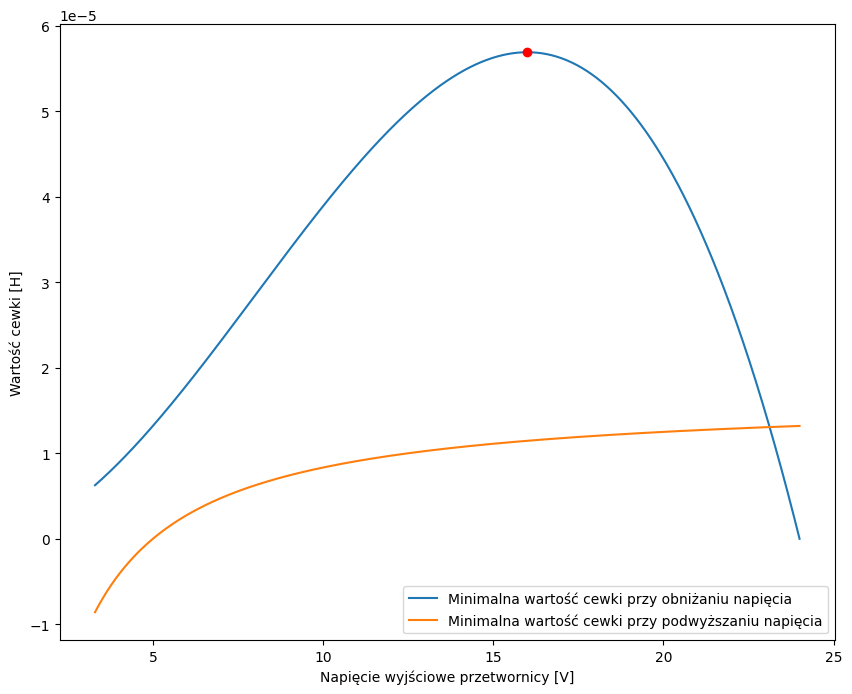

In [6]:
plt.figure(figsize=(10,8))

plt.plot(V_OUT, L_BUCK, label='Minimalna wartość cewki przy obniżaniu napięcia')
plt.plot(V_OUT, L_BOOST, label='Minimalna wartość cewki przy podwyższaniu napięcia')
plt.plot(V_OUT[crit_ind], max(L_BUCK), color='r', marker='o')
plt.xlabel('Napięcie wyjściowe przetwornicy [V]')
plt.ylabel('Wartość cewki [H]')
plt.legend()

In [10]:
# input filter
f_c = 10000

L = 15 * 10**(-6)
Cf1 = 47 * 10**(-6) # https://product.tdk.com/en/search/capacitor/ceramic/mlcc/characteristic
Cf2 = 1/((2 * np.pi * 0.1 * min(f_SW))**2 * L)

Rd = np.sqrt(L/Cf2)
Cd = 5*Cf2

print("filter caps:", Cf1, Cf2)
print("damping resistor: ", Rd)
print("damping cap: ", Cd)



filter caps: 4.7e-05 1.688686394038963e-05
damping resistor:  0.9424777960769378
damping cap:  8.443431970194815e-05


In [23]:
dV_OUT = 0.2

C_BUCK_MIN = (K_ind * max(I_MAX))**2 * max(L_BUCK) / (2 * min(V_OUT) * dV_OUT)
C_BOOST_MIN = max(I_MAX) * max(D_BOOST) / (min(f_SW) * dV_OUT)

In [ ]:
# switching current
dImax_BUCK = D_BUCK * (max(V_IN) - V_OUT) / (min(f_SW) * L) 
I_SWmax_BUCK = dImax_BUCK/2 + I_MAX

dImax_BOOST = D_BOOST * min(V_IN) / (min(f_SW) * L)
I_SWmax_BOOST = dImax_BOOST/2 + I_MAX/(1 - D_BOOST)